In [1]:
#A2e2a_HousingLoans_Data-Exploration-Visualization to make a classification model on Challenge 2

## Goal: Explore data w/ visualizations for Adventure Works dataset 
      #    for purpose of Classification Supervised ML w/ label= BikeBuyer

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

LoanTrain_C = pd.read_csv('progressData/LoanTrain_Clean_2019-08-12d.csv', header=0)
print(LoanTrain_C.shape)
LoanTrain_C.head(10)

(500000, 23)


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
5,5,1,1,3,1,133.0,3,221,13,55,...,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False,1
6,6,3,1,1,1,240.0,3,374,28,131,...,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False,1
7,7,2,1,1,1,210.0,3,322,37,35,...,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True,1
8,8,1,1,3,2,209.0,3,24,37,20,...,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True,1
9,9,1,1,3,1,197.0,3,194,9,20,...,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False,0


In [3]:
# Testing for Class Imbalance by Examining Classes where label= accepted
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

LoanTrain_C_counts =  LoanTrain_C['accepted'].value_counts()
print(LoanTrain_C_counts) 

1    250114
0    249886
Name: accepted, dtype: int64


In [4]:
#Above- Looks about equal.


# Load label dataset, display shape, & explore first 10 rows of Pandas data frame

LoanTrainL = LoanTrain_C['accepted']
print(LoanTrainL.shape)
LoanTrainL.head(10)

(500000,)


0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: accepted, dtype: int64

In [5]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(LoanTrain_C, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(LoanTrain_C[col].value_counts())
        
cat_cols = ['msa_md', 'state_code','county_code', 'lender', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
count_unique(LoanTrain_C, cat_cols)


For column msa_md
-1      76982
 24     12993
 314    11014
 305    10340
 101    10059
 358     9590
 333     9525
 374     8763
 18      8466
 25      7409
 207     7206
 350     6242
 371     5793
 286     5439
 395     5309
 205     5061
 318     4921
 91      4797
 308     4632
 16      4614
 335     4609
 10      4597
 171     4436
 45      3942
 324     3805
 376     3796
 194     3749
 141     3715
 263     3657
 398     3577
        ...  
 145      128
 201      126
 261      126
 164      125
 302      120
 405      120
 35       119
 204      119
 140      118
 212      117
 146      116
 196      114
 361      113
 394      113
 366      111
 406      110
 233      108
 325      104
 28       104
 360      104
 320      101
 195      100
 334       98
 111       97
 84        93
 375       89
 70        86
 152       72
 304       63
 174       57
Name: msa_md, Length: 409, dtype: int64

For column state_code
 37    61967
 6     38712
 2     32509
-1     19132
 22    17476

In [6]:
#Calculate loan_amount to applicant_income ratio

LoanTrain_C['LTI'] = (LoanTrain_C['loan_amount']) / (LoanTrain_C['applicant_income'])
LoanTrain_C['LTI']

0         2.916667
1         3.122807
2         2.432836
3         1.476190
4         4.295775
5         2.607843
6         2.307692
7         3.818182
8         0.856557
9         2.290698
10        4.089744
11        2.968254
12        1.864865
13        2.666667
14        0.877907
15        3.924528
16        2.391892
17        1.864865
18        1.756757
19        1.428571
20        2.707317
21        2.782609
22        1.818182
23        3.520737
24        7.082353
25        2.949495
26        2.092593
27        0.283019
28        1.442308
29        4.906667
            ...   
499970    3.986486
499971    0.435897
499972    2.100000
499973    6.729167
499974    7.320000
499975    2.445946
499976    3.507246
499977    0.604651
499978    3.185185
499979    2.000000
499980    2.776316
499981    1.861111
499982    2.307692
499983    1.250000
499984    5.878788
499985    3.350000
499986    2.920792
499987    2.342466
499988    1.870130
499989    3.118812
499990    2.405063
499991    5.

In [7]:
#Below- Aggregating Categorical Columns

def county_code_xform(x):
    if x > 260: return 5
    elif 195 < x <= 260: return 4
    elif 130 < x <= 195: return 3
    elif 65 <= x <= 130: return 2
    elif 0 <= x < 65: return 1
    

LoanTrain_C["CountyGroup"] = LoanTrain_C['county_code'].map(county_code_xform)
print(LoanTrain_C["CountyGroup"])

0         4.0
1         5.0
2         5.0
3         3.0
4         1.0
5         1.0
6         3.0
7         1.0
8         1.0
9         1.0
10        4.0
11        1.0
12        1.0
13        4.0
14        4.0
15        5.0
16        2.0
17        1.0
18        3.0
19        1.0
20        4.0
21        1.0
22        3.0
23        4.0
24        3.0
25        2.0
26        NaN
27        1.0
28        1.0
29        1.0
         ... 
499970    4.0
499971    5.0
499972    4.0
499973    2.0
499974    4.0
499975    2.0
499976    3.0
499977    5.0
499978    3.0
499979    4.0
499980    3.0
499981    2.0
499982    2.0
499983    2.0
499984    2.0
499985    2.0
499986    4.0
499987    1.0
499988    1.0
499989    3.0
499990    4.0
499991    5.0
499992    5.0
499993    1.0
499994    3.0
499995    NaN
499996    2.0
499997    3.0
499998    3.0
499999    3.0
Name: CountyGroup, Length: 500000, dtype: float64


In [8]:
#Below- Aggregating Categorical Columns

def lender_xform(x):
    if x > 5208: return 5
    elif 3906 < x <= 5208: return 4
    elif 2604 < x <= 3906: return 3
    elif 1302 <= x <= 2604: return 2
    elif 0 <= x < 1302: return 1
    

LoanTrain_C["LenderGroup"] = LoanTrain_C['lender'].map(lender_xform)
print(LoanTrain_C["LenderGroup"])

0         4
1         2
2         5
3         5
4         1
5         1
6         5
7         2
8         2
9         3
10        1
11        4
12        4
13        4
14        5
15        5
16        3
17        2
18        4
19        2
20        5
21        4
22        4
23        2
24        3
25        2
26        3
27        4
28        5
29        2
         ..
499970    2
499971    3
499972    3
499973    2
499974    2
499975    1
499976    2
499977    3
499978    3
499979    2
499980    4
499981    5
499982    4
499983    5
499984    4
499985    1
499986    5
499987    4
499988    5
499989    5
499990    2
499991    5
499992    5
499993    3
499994    5
499995    1
499996    5
499997    2
499998    5
499999    5
Name: LenderGroup, Length: 500000, dtype: int64


In [ ]:
LoanTrain_C['applicant_race'].value_counts()

5    361538
6     59862
3     40495
2     25756
7      5678
1      4332
4      2339
Name: applicant_race, dtype: int64

In [ ]:
#Aggregate categories for applicant_race

race_cats = {5:5, 3:3, 2:2, 1:1, 4:1,
             6:6, 7:6}
LoanTrain_C['RaceGroup'] = [race_cats[x] for x in LoanTrain_C['applicant_race']]

In [ ]:
print(LoanTrain_C["RaceGroup"])

0         5
1         5
2         5
3         5
4         3
5         5
6         5
7         5
8         5
9         5
10        6
11        5
12        5
13        5
14        5
15        6
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        3
26        5
27        5
28        5
29        5
         ..
499970    5
499971    5
499972    3
499973    2
499974    6
499975    5
499976    5
499977    5
499978    6
499979    5
499980    5
499981    5
499982    3
499983    5
499984    3
499985    5
499986    5
499987    5
499988    5
499989    2
499990    5
499991    6
499992    5
499993    5
499994    5
499995    2
499996    5
499997    3
499998    5
499999    5
Name: RaceGroup, Length: 500000, dtype: int64


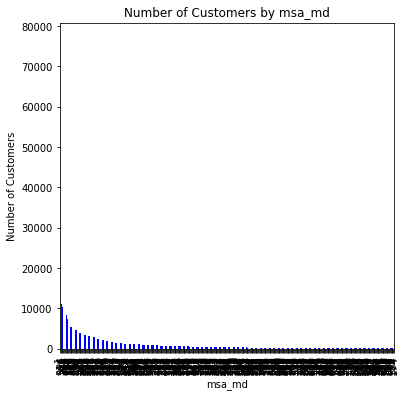

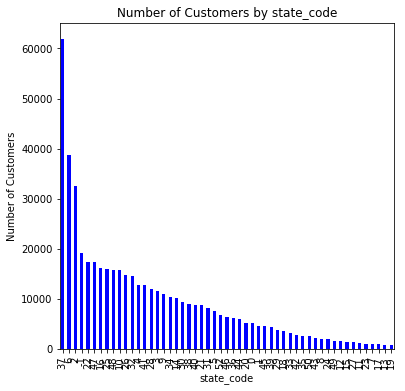

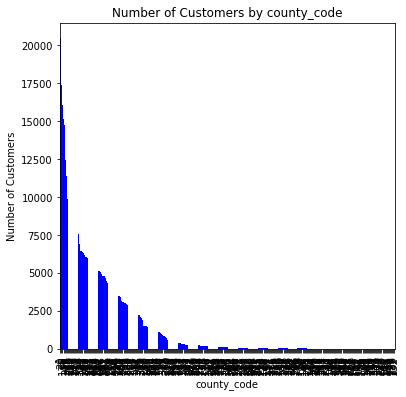

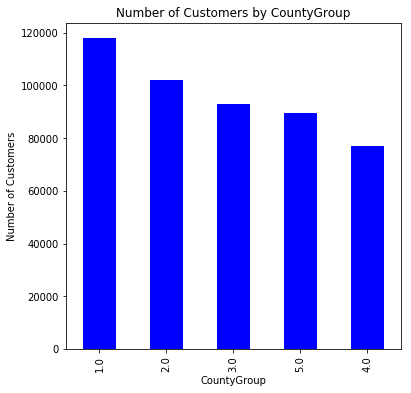

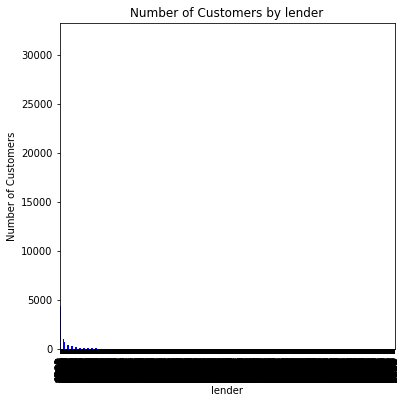

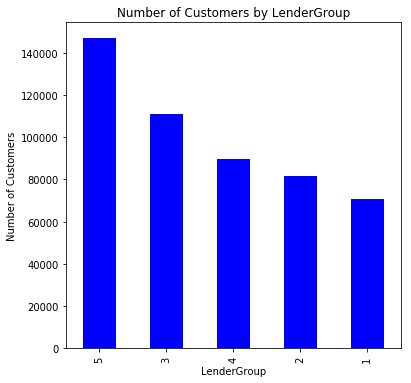

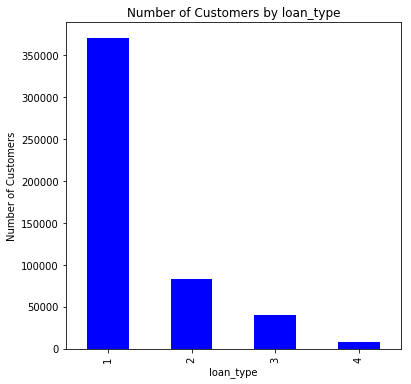

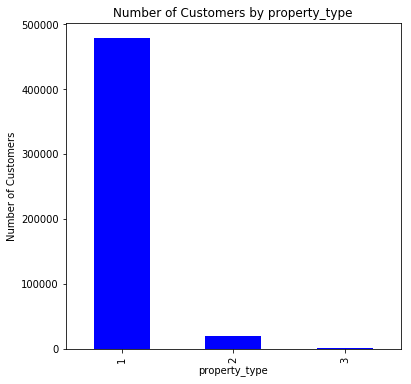

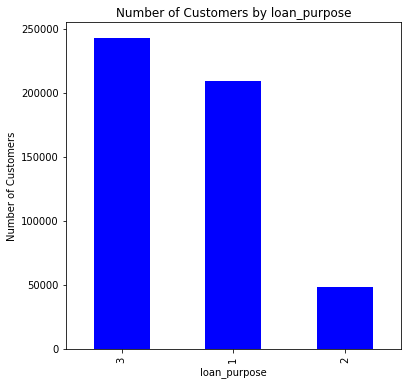

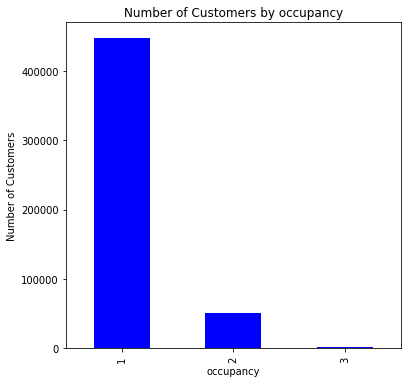

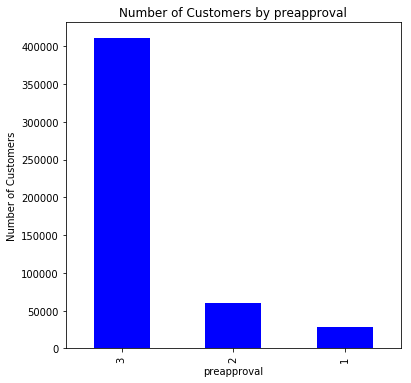

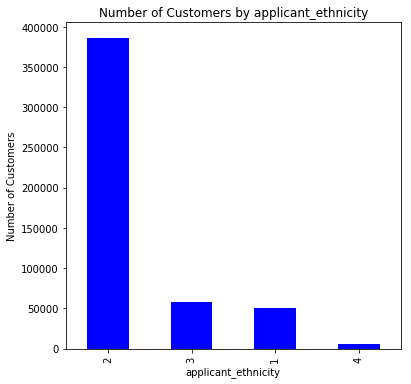

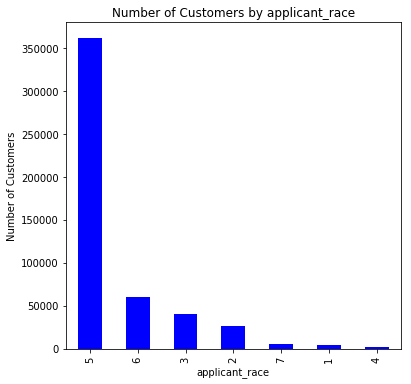

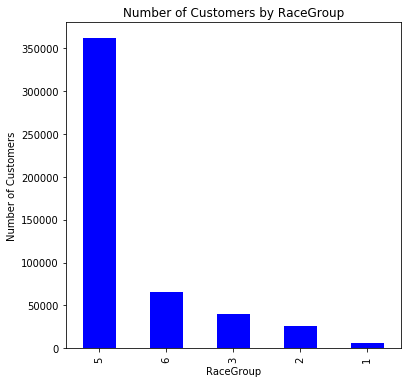

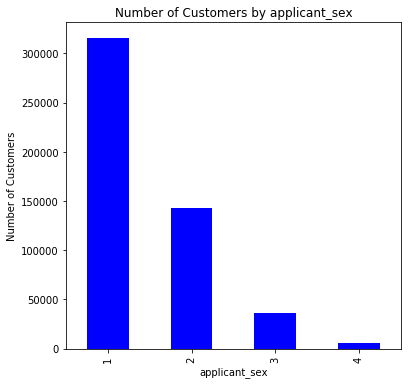

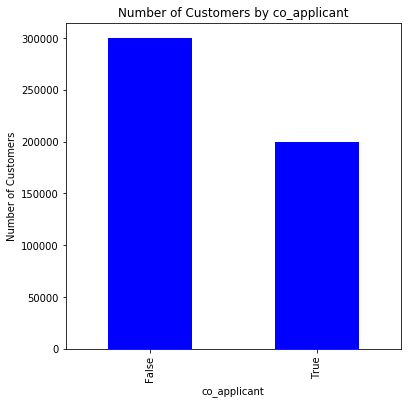

In [ ]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(LoanTrain_C, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = LoanTrain_C[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Number of Customers by ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
plot_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']
plot_bars(LoanTrain_C, plot_cols)

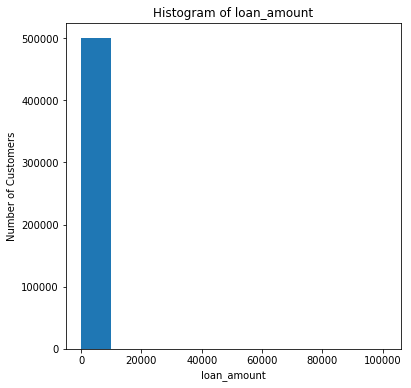

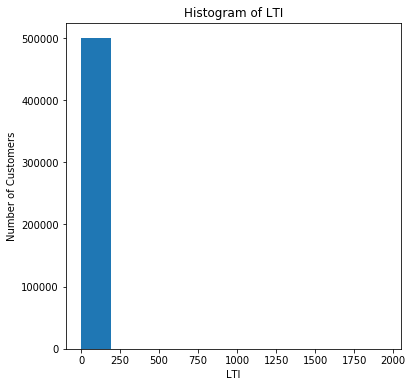

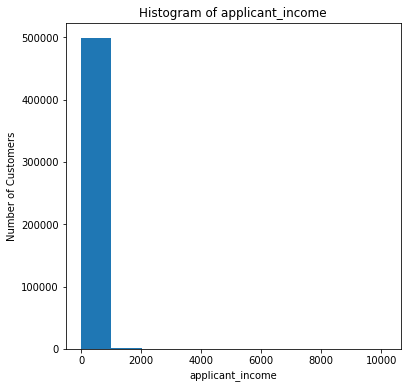

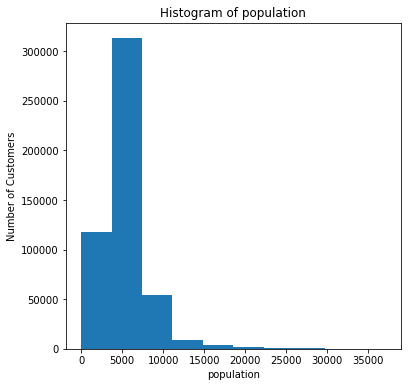

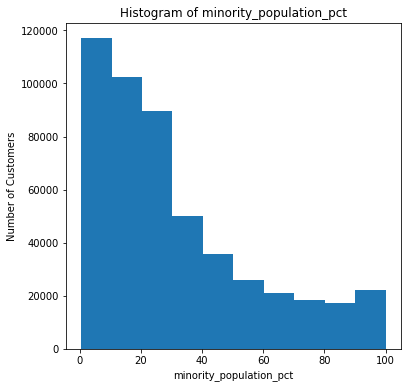

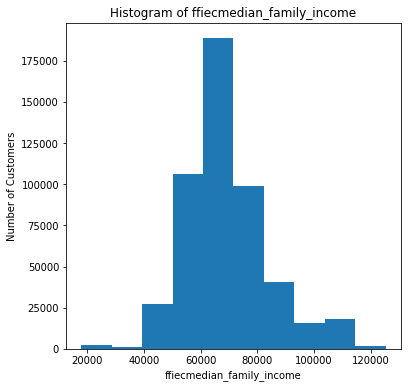

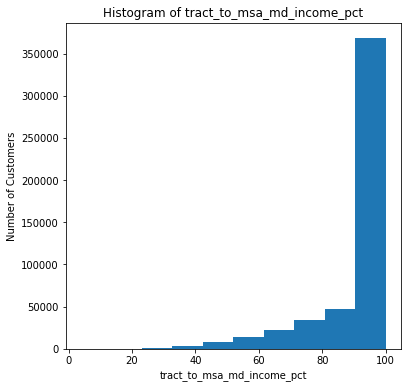

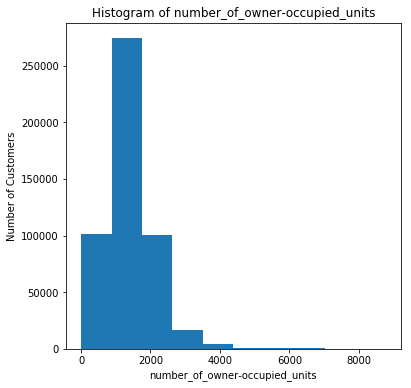

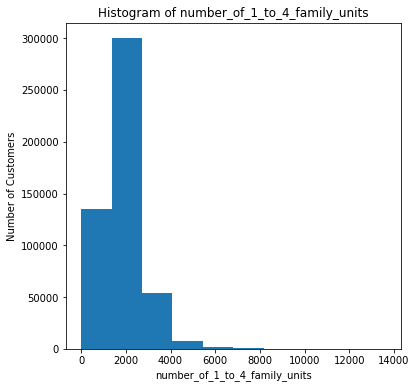

In [ ]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(LoanTrain_C, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        LoanTrain_C[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['loan_amount', 'LTI', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

plot_histogram(LoanTrain_C, num_cols)  

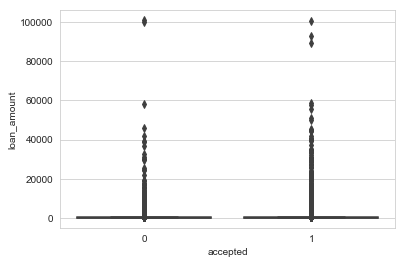

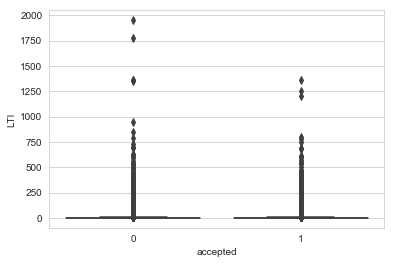

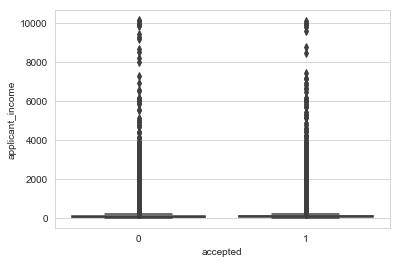

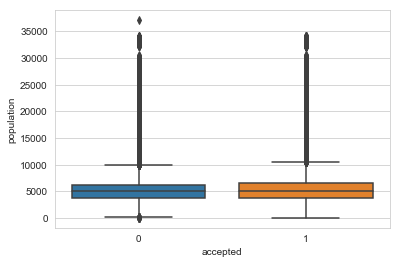

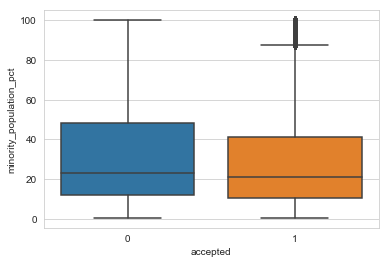

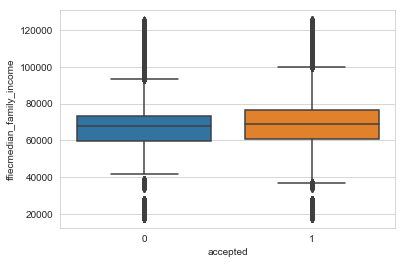

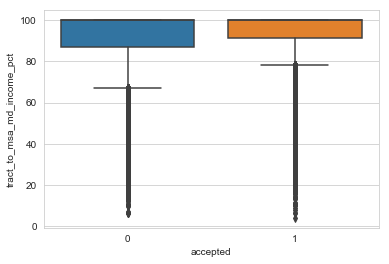

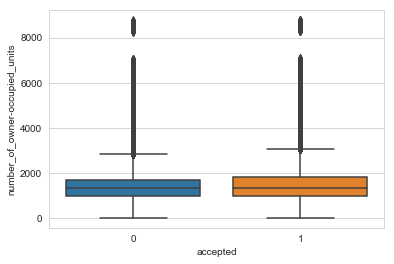

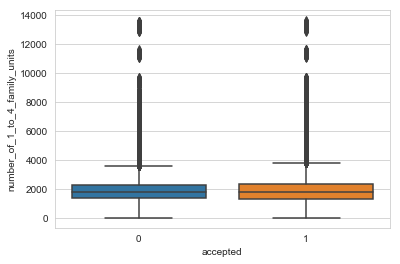

In [ ]:
#Below- Visualize Class Separation by Numeric Features

def plot_box(LoanTrain_C, cols, col_x = 'accepted'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = LoanTrain_C)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['loan_amount', 'LTI', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
plot_box(LoanTrain_C, num_cols)

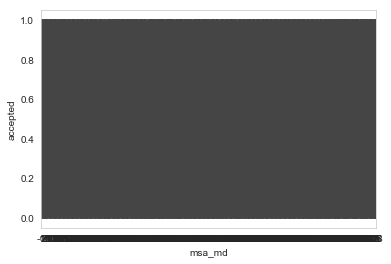

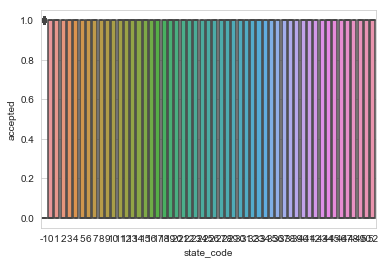

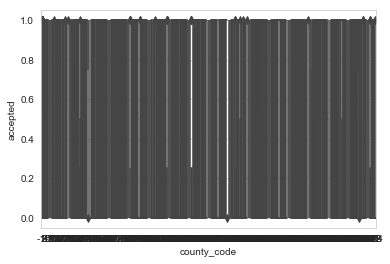

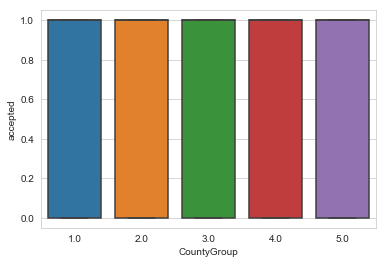

In [ ]:
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol

def plot_box(LoanTrain_C, cols, col_y = 'accepted'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = LoanTrain_C)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']

plot_box(LoanTrain_C, cat_cols)

In [ ]:
def plot_box(LoanTrain_C, cols, col_y = 'accepted'):
    for col in cols:   # Iterates over list of columns
        f, ax = plt.subplots(figsize=(50, 5))
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = LoanTrain_C)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['msa_md', 'state_code','county_code', 'lender']

plot_box(LoanTrain_C, cat_cols)

In [ ]:
def plot_box(LoanTrain_C, cols, col_y = 'accepted'):
    for col in cols:   # Iterates over list of columns
        f, ax = plt.subplots(figsize=(5, 5))
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = LoanTrain_C, orient='h')   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']
plot_box(LoanTrain_C, cat_cols)

In [ ]:
def plot_box(LoanTrain_C, cols):#
    for col in cols:   # Iterates over list of columns
         sns.set(style="whitegrid")   # Set style for plot grid
#        data = sns.load_dataset('LoanTrain_C')
#         ax = sns.boxplot(x=LoanTrain_C[col])   # Use boxplot method from seaborn 
         ax = sns.boxplot(x=col, hue="accepted", data=LoanTrain_C, orient='v')
         plt.xlabel(col)   # Set x-axis label w/ matplotlib
#        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
         plt.show()
        
cat_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']

plot_box(LoanTrain_C, cat_cols)

In [ ]:
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol


#sns.set(style="whitegrid")
#tips = sns.load_dataset("LoanTrain_C")
#ax = sns.boxplot(x=LoanTrain_C["county_code"])    
    
    
def plot_box(LoanTrain_C, cols):#
    for col in cols:   # Iterates over list of columns
         sns.set(style="whitegrid")   # Set style for plot grid
#        data = sns.load_dataset('LoanTrain_C')
         ax = sns.boxplot(x=LoanTrain_C[col])   # Use boxplot method from seaborn 
         plt.xlabel(col)   # Set x-axis label w/ matplotlib
#        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
         plt.show()
        
cat_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']

plot_box(LoanTrain_C, cat_cols)

In [ ]:
#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(LoanTrain_C, cols, col_x = 'accepted'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = LoanTrain_C)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(LoanTrain_C, num_cols)

In [ ]:
#Above- Difficult to see a relationship with accepted.

# Plot Categorical & Numerical Variables w/ Seaborn Violin Plots

def plot_violin(LoanTrain_C, cols, col_y = 'accepted'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.violinplot(col, col_y, data = LoanTrain_C)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
#cat_cols = ['msa_md', 'state_code','county_code', 'lender', 'loan_type',  'property_type', 'loan_purpose', 'occupancy',
#            'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant', 'accepted']
plot_violin(LoanTrain_C, cat_cols)

In [ ]:
#Below- Visualize Class Separation by Categorical Features

cat_cols = ['msa_md', 'state_code','county_code', 'CountyGroup', 'lender', 'LenderGroup', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
            'preapproval', 'applicant_ethnicity', 'applicant_race', 'RaceGroup', 'applicant_sex', 'co_applicant']

LoanTrain_C['dummy'] = np.ones(shape = LoanTrain_C.shape[0])
for col in cat_cols:
    print(col)
    counts = LoanTrain_C[['dummy', 'accepted', col]].groupby(['accepted', col], as_index = False).count()
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (15,5))
    plt.subplot(1, 2, 1)
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Not Accepted')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['accepted'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Accepted')
    plt.ylabel('count')
    plt.show()

In [ ]:
#Below- Visualize Class Separation by Categorical Features

cat_cols = ['CountyGroup', 'LenderGroup', 'RaceGroup']

LoanTrain_C['dummy'] = np.ones(shape = LoanTrain_C.shape[0])
for col in cat_cols:
    print(col)
    counts = LoanTrain_C[['dummy', 'accepted', col]].groupby(['accepted', col], as_index = False).count()
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Not Accepted')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['accepted'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation = 90)
    plt.title('Counts for ' + col + '\n Accepted')
    plt.ylabel('count')
    plt.show()

In [ ]:
#Below- Kernel Density Estimation (KDE) plots provides a smooth denisty curve of data values w/ Seaborn distplot

def plot_density_hist(LoanTrain_C, cols, bins = 10, hist = False):
    for col in cols:        # Iterates over list of columns
        sns.set_style("whitegrid")     # Set style for plot grid
        sns.distplot(LoanTrain_C[col], bins = bins, rug = True, hist = hist)    # Use distplot type w/ rug along x-axis   
        plt.title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        plt.xlabel(col)    # Set x-axis labels w/ matplotlib
        plt.ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
#num_cols = ['loan_amount', 'LTI', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
#            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
            
plot_density_hist(LoanTrain_C, num_cols) 

In [ ]:
# Combine histogram & KDE plots w/ Seaborn

plot_density_hist(LoanTrain_C, num_cols, bins = 20, hist = True)

In [ ]:
#Above- Many of the distributions above look to be skewed which was also noticed in the differences between mean & median.

#Below- Measure the symmetry of a distribution, called skewness.
 # Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme

LoanTrain_C.skew(axis=0)

In [ ]:
#Above-  Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme ---> majority of features
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme
# 6 features have acceptable right skewness, 4 features have problematic right skewness, 19 features and the label have
 # extreme right skewness, 6 features have acceptable left skewness, and 2 features have extreme left skewness. 

    

#Below- Measure the combined sizes of the tails, called kurtosis. (Fisher's definition = 0)
 # Kurtosis of a normal distribution is equal to 0.
 # Kurtosis greater than 0 has heavier tails than a normal distribution.
 # Kurtosis less than 0 has lighter tails than a normal distribution.

LoanTrain_C.kurtosis(axis=0)

In [ ]:
#Above -  Kurtosis of a normal distribution is equal to 0.
 # Kurtosis greater than 0 has heavier tails and more 'pointy' than a normal distribution.
 # Kurtosis less than 0 has lighter tails and more 'flatter' than a normal distribution.


#Below - Due to skewness, transformations will be needed to be performed on data to approximate more of a normal distribution.
     # For skewness greater than +0.5 will use a natural log(X+C) where C=1
     # This log transformation can work for skewed data w/ values =0

LoanTrain_C['log(x+1)_loan_amount'] = np.log(LoanTrain_C['loan_amount']+1)
LoanTrain_C['log(x+1)_LTI'] = np.log(LoanTrain_C['LTI']+1)
LoanTrain_C['log(x+1)_applicant_income'] = np.log(LoanTrain_C['applicant_income']+1)
LoanTrain_C['log(x+1)_population'] = np.log(LoanTrain_C['population']+1)
LoanTrain_C['log(x+1)_minority_population_pct'] = np.log(LoanTrain_C['minority_population_pct']+1)
LoanTrain_C['log(x+1)_ffiecmedian_family_income'] = np.log(LoanTrain_C['ffiecmedian_family_income']+1)
LoanTrain_C['log(x+1)_number_of_owner-occupied_units'] = np.log(LoanTrain_C['number_of_owner-occupied_units']+1)
LoanTrain_C['log(x+1)_number_of_1_to_4_family_units'] = np.log(LoanTrain_C['number_of_1_to_4_family_units']+1)

     # For skewness less than -0.5 will use a power tranformation X^10

LoanTrain_C['pwr10_tract_to_msa_md_income_pct'] = np.power(LoanTrain_C['tract_to_msa_md_income_pct'],10)

In [ ]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(LoanTrain_C, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        LoanTrain_C[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols_log = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']

plot_histogram(LoanTrain_C, num_cols_log)    

In [ ]:
#Above- # Log transformations seem more symmetrical
 # Also don't seem to separate label cases any better


#Below- Kernel Density Estimation (KDE) plots provides a smooth denisty curve of data values w/ Seaborn distplot

def plot_density_hist(LoanTrain_C, cols, bins = 10, hist = False):
    for col in cols:        # Iterates over list of columns
        sns.set_style("whitegrid")     # Set style for plot grid
        sns.distplot(LoanTrain_C[col], bins = bins, rug = True, hist = hist)    # Use distplot type w/ rug along x-axis   
        plt.title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        plt.xlabel(col)    # Set x-axis labels w/ matplotlib
        plt.ylabel('Number of Customers')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols_log = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']
            
#plot_density_hist(LoanTrain_C, num_cols_log)  

# Combine histogram & KDE plots w/ Seaborn

plot_density_hist(LoanTrain_C, num_cols_log, bins = 20, hist = True)

In [ ]:
#Display violin plot distributions of log transformed features & raw features

num_cols = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']

for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10, 4))
    sns.violinplot(x = 'accepted', y = col, hue = 'accepted', data = LoanTrain_C)
    plt.ylabel('Value')
    plt.xlabel(col)
    plt.show()

In [ ]:
#Above- Shows potentially two multimodal distributions (air_particulate & adults w/ less than HS diploma) which may affect ML training model.
 # Many of the distributions above look to be skewed which was also noticed in the differences between mean & median.

#Below- Measure the symmetry of a distribution, called skewness.
 # Skewness of a normal distribution is symmetrical and equal to 0.
 # Skewness greater than 0 has heavier tails toward the right than a normal distribution.
    # Skewness b/w 0 thru +0.5 = acceptable
    # Skewness b/w +0.5 thru +1.0 = problematic
    # Skewness +1.0 or more = extreme
 # Skewness less than 0 has heavier tails toward the left than a normal distribution.
    # Skewness b/w 0 thru -0.5 = acceptable
    # Skewness b/w -0.5 thru -1.0 = problematic
    # Skewness -1.0 or more = extreme

LoanTrain_C.skew(axis=0)

In [ ]:
#Below- Visualize distributions w/ 2 Dimensional Plots (relationship b/w 2 variables [for ML is b/w features & label])
  #Step 1- Visualize frequency distributions scatter plots of numerical ID features vs label w/ pandas scatter plots plot.scatter
    # ID Features
    
def plot_scatter(LoanTrain_C, cols, col_y = 'accepted'):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(7,6))    # Figure plot & axis defined using matplotlib
        ax = fig.gca()
        LoanTrain_C.plot.scatter(x = col, y = col_y, ax = ax)    # Use plot.scatter method from pandas on subset of data frame   
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
ID_num_cols = ['loan_amount']
plot_scatter(LoanTrain_C, ID_num_cols)

In [ ]:
#Below- Multi-axis plots
 # Pair-wise Scatter Plot using pairplot & map_upper in seaborn
    #ID Features
    
num_cols = ['log(x+1)_loan_amount', 'log(x+1)_LTI', 'log(x+1)_applicant_income', 'log(x+1)_population', 'log(x+1)_minority_population_pct', 'log(x+1)_ffiecmedian_family_income',
            'pwr10_tract_to_msa_md_income_pct', 'log(x+1)_number_of_owner-occupied_units', 'log(x+1)_number_of_1_to_4_family_units']

sns.pairplot(LoanTrain_C[num_cols],  palette = "Set2", diag_kind = "kde", height = 10)

In [ ]:
#Below- Multi-axis plots
 # Pair-wise Scatter Plot using pairplot & map_upper in seaborn
    #ID Features
    
num_cols = ['loan_amount', 'LTI', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income',
            'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

sns.pairplot(LoanTrain_C[num_cols],  palette = "Set2", diag_kind = "kde", height = 8)

In [ ]:
# Check if variables correlate using Pandas corr() method. 
  # Statistician Jacob Cohen suggested the following guidelines:
   #  Correlation    Meaning
   # 1. 0 - 0.1    Negligible
   # 2. 0.1 - 0.3    Small
   # 3. 0.3 - 0.5   Medium
   # 4.  0.50 +      Large
    
# Clustering
 # Previously saw that we had a cluster of several overlapping variables.
  # 1) Correlation matrix is computed using Pandas corr method.
  # 2) A hierarchical clustering model is constructed using methods from scipy.cluster.hierarchy package.
  #    A hierarchical cluster model is created by linking values based on a measure of distance into a hierarchy or tree using linkage function.
  # 3) Correlation matrix is permuted based on hierarchy & plotted as a heat map.

#import scipy.cluster.hierarchy as sch

# Compute the correlation matrix
corrs = LoanTrain_C.corr(method='spearman')

# Create hierarchical clustering model
#dist = sch.distance.pdist(corrs)   # vector of pairwise distances using correlations
#linkage = sch.linkage(dist, method='complete') # Compute linkages for clusters
#ind = sch.fcluster(linkage, 0.5 * dist.max(), 'distance')  # Apply clustering algorithm

# Order columns of correlaton matrix according to hierarchy
#columns = [corrs.columns.tolist()[i] for i in list((np.argsort(ind)))]  # Order names for result
#corrs_clustered = corrs.reindex(columns)   # Reindex columns following heirarchy 

# Plot a heat map of clustered correlations
sns.heatmap(corrs)

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrs, xticklabels=1, yticklabels=1, cmap='YlGnBu')

In [ ]:
# Above - A prominent cluster of happiness, family, life expectancy, & GDP, which are all highly inter-correlated (bright spot on map).

# Display correlation matrix w/ numerical values using Pandas style.background_gradient()

corrs.style.background_gradient().set_precision(2)

In [ ]:
#Save this cleaned data to a csv

LoanTrain_C.to_csv('progressData/LoanTrain_Clean_2019-08-12-A2e2a.csv', index = False, header = True)